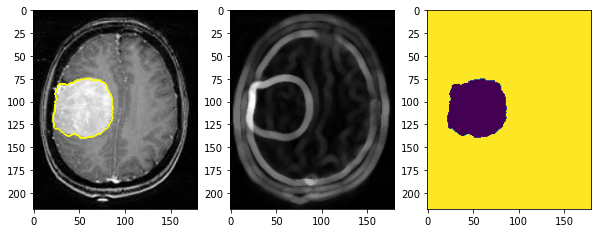

45.692375000000006


In [27]:
from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt
import numpy as np
from skimage.color import rgb2hsv, gray2rgb
from matplotlib import cm
import skimage.filters.rank as skr
from skimage.morphology import disk
from skimage.color import rgb2gray
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries

im = imread("mri_brain-Copy1.jpg")

markers = np.zeros_like(rgb2gray(im))

markers[110,50] = 1 #Sky
markers[110,100] = 2 #Grass-left

ws = watershed(gradient, markers)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(mark_boundaries(im,ws))
plt.subplot(1,3,2)
plt.imshow(gradient,cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(ws)
plt.show()
    
gradient = skr.gradient(skr.median(rgb2gray(im),disk(6)), disk(4))
ws = watershed(gradient, markers)

def aire(ws):
    nb_pix = 0
    taille_pix =  0.115**2
    for y in range(ws.shape[0]):
        for x in range(ws.shape[1]):
            if ws[y,x] == 1:
                nb_pix +=1
    aire_tumeur = nb_pix*taille_pix 
    return aire_tumeur

test = aire(ws)
print(test)